# Data Cleaning And Preprocessing

This notebook is the last one before we start training and comparing our models. As such, our data will need to be ready to be fed into these algorithms by the end of this step.

Our objectives are:<br>
-dealing with the null values,<br>
-translating string values to numerical values,<br>
-binarizing the target variable,<br>
-balancing the data,<br>
-selecting the most important features,<br>
-normalizing the data.

All these transformations will ensure our data is ready to be used.

# 

# 0. Libraries

In [295]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# 

# 1. Dealing With Null Values

Null values will make certain rows unusable. Since we have a large amount of samples, we can simply exclude these rows, instead of modifying them.

In [296]:
#read the csv with the extracted data (pylidc and pyradiomics features combined, slice by slice)
df = pd.read_csv("features_combined.csv")
print("Initial shape: ", df.shape)

#getting amount of rows with null values
rows_null_num = df.isnull().any(axis=1).sum()
print("Rows with null values: ", rows_null_num)

#drop rows with null values
df = df.dropna()
print("Shape after removing rows: ", df.shape)

#reseting the index
df.reset_index(drop=True, inplace=True)


df.tail()

Initial shape:  (39767, 143)
Rows with null values:  29
Shape after removing rows:  (39738, 143)


,scanID,patientID,annotationID,noduleID,subtlety,internalStructure,calcification,sphericity,margin,lobulation,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
39733,1018,LIDC-IDRI-0127,6859,2651,5,1,6,5,5,2,...,507.253885,0.003966,6.615987,0.372144,21.220923,0.030903,0.016933,773.073592,0.050433,18.187751
39734,1018,LIDC-IDRI-0127,6859,2651,5,1,6,5,5,2,...,317.151921,0.006790,6.411944,0.373757,22.283018,0.035191,0.022321,475.928204,0.059559,17.234483
39735,1018,LIDC-IDRI-0127,6859,2651,5,1,6,5,5,2,...,293.377966,0.007882,6.029190,0.388664,37.883572,0.028339,0.034135,369.576876,0.070248,20.433615
39736,1018,LIDC-IDRI-0127,6859,2651,5,1,6,5,5,2,...,225.216583,0.007078,5.906476,0.460417,9.210254,0.019709,0.066303,316.625583,0.091272,26.612528
39737,1018,LIDC-IDRI-0127,6859,2651,5,1,6,5,5,2,...,65.540091,0.025195,5.282221,0.451429,3.054959,0.051135,0.113456,99.343536,0.075466,14.189477


In [297]:
#read the pyradiomics csv file (slice by slice) and drop the null values
df_pyradiomics = pd.read_csv('features_pyradiomics.csv', index_col=False)
print("Initial shape: ", df_pyradiomics.shape)

#getting amount of rows with null values
rows_null_num = df_pyradiomics.isnull().any(axis=1).sum()
print("Rows with null values: ", rows_null_num)

#drop rows with null values
df_pyradiomics = df_pyradiomics.dropna()
print("Shape after removing rows: ", df_pyradiomics.shape)

#reseting the index
df_pyradiomics.reset_index(drop=True, inplace=True)


df_pyradiomics.tail()

Initial shape:  (39765, 129)
Rows with null values:  27
Shape after removing rows:  (39738, 129)


,scanID,patientID,noduleID,annotationID,sliceID,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
39733,1018,LIDC-IDRI-0127,2651,6859,40183,0+unknown,1.23.5,2.4.0,1.3.0,3.9.13,...,507.253885,0.003966,6.615987,0.372144,21.220923,0.030903,0.016933,773.073592,0.050433,18.187751
39734,1018,LIDC-IDRI-0127,2651,6859,40184,0+unknown,1.23.5,2.4.0,1.3.0,3.9.13,...,317.151921,0.006790,6.411944,0.373757,22.283018,0.035191,0.022321,475.928204,0.059559,17.234483
39735,1018,LIDC-IDRI-0127,2651,6859,40185,0+unknown,1.23.5,2.4.0,1.3.0,3.9.13,...,293.377966,0.007882,6.029190,0.388664,37.883572,0.028339,0.034135,369.576876,0.070248,20.433615
39736,1018,LIDC-IDRI-0127,2651,6859,40186,0+unknown,1.23.5,2.4.0,1.3.0,3.9.13,...,225.216583,0.007078,5.906476,0.460417,9.210254,0.019709,0.066303,316.625583,0.091272,26.612528
39737,1018,LIDC-IDRI-0127,2651,6859,40187,0+unknown,1.23.5,2.4.0,1.3.0,3.9.13,...,65.540091,0.025195,5.282221,0.451429,3.054959,0.051135,0.113456,99.343536,0.075466,14.189477


In [298]:
#read the pylidics csv file (annotation by annotation) and drop the null values
df_pylidc = pd.read_csv('features_pylidc.csv', index_col=False) 
print("Initial shape: ", df_pylidc.shape)

#getting amount of rows with null values
rows_null_num = df_pylidc.isnull().any(axis=1).sum()
print("Rows with null values: ", rows_null_num)


df_pylidc.tail()

Initial shape:  (6859, 18)
Rows with null values:  0


,scanID,patientID,annotationID,noduleID,subtlety,internalStructure,calcification,sphericity,margin,lobulation,spiculation,texture,diameter,surfaceArea,volume,sliceThickness,pixelSpacing,malignancy
6854,1017,LIDC-IDRI-0638,6856,2649,2,1,6,4,3,1,1,5,6.903409,113.559516,87.615658,2.5,0.605469,3
6855,1017,LIDC-IDRI-0638,6857,2649,4,1,6,3,4,2,1,5,9.477089,200.490851,166.799683,2.5,0.605469,4
6856,1017,LIDC-IDRI-0638,6855,2650,5,1,6,4,5,1,1,5,5.208441,112.331939,81.383582,2.5,0.605469,2
6857,1018,LIDC-IDRI-0127,6858,2651,5,1,2,5,5,4,5,5,39.591042,5193.191357,24959.267801,3.0,0.779297,2
6858,1018,LIDC-IDRI-0127,6859,2651,5,1,6,5,5,2,1,5,39.221169,5114.451940,25451.183733,3.0,0.779297,3


# 

# 2. Dealing With Different Data Types

A machine learning model cannot take string as input. As such, we need to analyze which features have strings and decide what to do with these.<br>
NOTE: we decided to exclude all columns that were not numerical values, since the majoraty contained little to no valuable information. We still selected the features we could further process, in hopes to do so in a near future!

In [299]:
#see the data types present, and their amount
df.dtypes.value_counts()

float64    113
object      18
int64       12
dtype: int64

In [300]:
#get columns with object data type
object_columns = df.select_dtypes(include=['object'])
print(object_columns.shape)
object_columns.tail()

(39738, 18)


,patientID,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,diagnostics_Image-original_Hash,diagnostics_Image-original_Dimensionality,diagnostics_Image-original_Spacing,diagnostics_Image-original_Size,diagnostics_Mask-original_Hash,diagnostics_Mask-original_Spacing,diagnostics_Mask-original_Size,diagnostics_Mask-original_BoundingBox,diagnostics_Mask-original_CenterOfMassIndex,diagnostics_Mask-original_CenterOfMass
39733,LIDC-IDRI-0127,0+unknown,1.23.5,2.4.0,1.3.0,3.9.13,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},4972716c4a2361d1e82aa18c058b9883e7918aca,2D,"(1.0, 1.0)","(50, 47)",4d58dddd81b4d85d2b3f78c0779f53f78bcfadcf,"(1.0, 1.0)","(50, 47)","(3, 3, 44, 43)","(23.358142962417098, 22.301400147383934)","(-23.358142962417098, -22.301400147383934)"
39734,LIDC-IDRI-0127,0+unknown,1.23.5,2.4.0,1.3.0,3.9.13,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},af991988c273abe8e067161cb03c665c7c403a8c,2D,"(1.0, 1.0)","(50, 47)",c0a8744c6cd4485ba6feb891fa9ae96a0235d364,"(1.0, 1.0)","(50, 47)","(4, 4, 37, 41)","(21.96421471172962, 23.863817097415506)","(-21.96421471172962, -23.863817097415506)"
39735,LIDC-IDRI-0127,0+unknown,1.23.5,2.4.0,1.3.0,3.9.13,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},466857a5a891047ca49fbf3d2122b61a1c6813ef,2D,"(1.0, 1.0)","(50, 47)",671ed418dffc2f709655f9a8439c2bc8e3f105d5,"(1.0, 1.0)","(50, 47)","(8, 9, 31, 34)","(22.83535762483131, 24.917678812415655)","(-22.83535762483131, -24.917678812415655)"
39736,LIDC-IDRI-0127,0+unknown,1.23.5,2.4.0,1.3.0,3.9.13,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},6aa04900d34e37cbdc1234b16b9750cbf7e37a48,2D,"(1.0, 1.0)","(50, 47)",17abbd534952b7b526393271097ce08811b4fdc6,"(1.0, 1.0)","(50, 47)","(12, 13, 24, 26)","(22.7, 25.252083333333335)","(-22.7, -25.252083333333335)"
39737,LIDC-IDRI-0127,0+unknown,1.23.5,2.4.0,1.3.0,3.9.13,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},c10aa2bbd6cfd9cb409ac56398310f2ad2b7470e,2D,"(1.0, 1.0)","(50, 47)",5abfd940755464c4a461c8f9451e2d865b0d7732,"(1.0, 1.0)","(50, 47)","(16, 17, 15, 16)","(22.702857142857145, 24.02857142857143)","(-22.702857142857145, -24.02857142857143)"


In [301]:
#remove the columns with non-important string data
df = df.drop(["patientID",
              "diagnostics_Versions_PyRadiomics",
              "diagnostics_Versions_Numpy",
              "diagnostics_Versions_SimpleITK",
              "diagnostics_Versions_PyWavelet",
              "diagnostics_Versions_Python",
              "diagnostics_Configuration_Settings",
              "diagnostics_Configuration_EnabledImageTypes",
              "diagnostics_Image-original_Hash",
              "diagnostics_Image-original_Dimensionality",
              "diagnostics_Image-original_Spacing",
              "diagnostics_Mask-original_Hash",
              "diagnostics_Mask-original_Spacing"], axis=1)

In [302]:
#get remaining columns with object data type
object_columns = df.select_dtypes(include=['object'])
print(object_columns.shape)
object_columns.tail()

(39738, 5)


,diagnostics_Image-original_Size,diagnostics_Mask-original_Size,diagnostics_Mask-original_BoundingBox,diagnostics_Mask-original_CenterOfMassIndex,diagnostics_Mask-original_CenterOfMass
39733,"(50, 47)","(50, 47)","(3, 3, 44, 43)","(23.358142962417098, 22.301400147383934)","(-23.358142962417098, -22.301400147383934)"
39734,"(50, 47)","(50, 47)","(4, 4, 37, 41)","(21.96421471172962, 23.863817097415506)","(-21.96421471172962, -23.863817097415506)"
39735,"(50, 47)","(50, 47)","(8, 9, 31, 34)","(22.83535762483131, 24.917678812415655)","(-22.83535762483131, -24.917678812415655)"
39736,"(50, 47)","(50, 47)","(12, 13, 24, 26)","(22.7, 25.252083333333335)","(-22.7, -25.252083333333335)"
39737,"(50, 47)","(50, 47)","(16, 17, 15, 16)","(22.702857142857145, 24.02857142857143)","(-22.702857142857145, -24.02857142857143)"


In [303]:
#define new dataframe that will contain the separated string data
objects_cols = ['diagnostics_Image-original_Size',
           'diagnostics_Mask-original_Size',
           'diagnostics_Mask-original_BoundingBox',
           'diagnostics_Mask-original_CenterOfMassIndex',
           'diagnostics_Mask-original_CenterOfMass']


#this is the dataframe with columns we need to separate!!
objects_df = df[objects_cols]
print(objects_df.shape)
objects_df.tail()

(39738, 5)


,diagnostics_Image-original_Size,diagnostics_Mask-original_Size,diagnostics_Mask-original_BoundingBox,diagnostics_Mask-original_CenterOfMassIndex,diagnostics_Mask-original_CenterOfMass
39733,"(50, 47)","(50, 47)","(3, 3, 44, 43)","(23.358142962417098, 22.301400147383934)","(-23.358142962417098, -22.301400147383934)"
39734,"(50, 47)","(50, 47)","(4, 4, 37, 41)","(21.96421471172962, 23.863817097415506)","(-21.96421471172962, -23.863817097415506)"
39735,"(50, 47)","(50, 47)","(8, 9, 31, 34)","(22.83535762483131, 24.917678812415655)","(-22.83535762483131, -24.917678812415655)"
39736,"(50, 47)","(50, 47)","(12, 13, 24, 26)","(22.7, 25.252083333333335)","(-22.7, -25.252083333333335)"
39737,"(50, 47)","(50, 47)","(16, 17, 15, 16)","(22.702857142857145, 24.02857142857143)","(-22.702857142857145, -24.02857142857143)"


In [304]:
#drop the columns we separated from the dataset
df = df.drop(columns = object_columns)


#see the data types present, and their amount
df.dtypes.value_counts()

float64    113
int64       12
dtype: int64

In [305]:
print(df.shape)
df.tail()

(39738, 125)


,scanID,annotationID,noduleID,subtlety,internalStructure,calcification,sphericity,margin,lobulation,spiculation,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
39733,1018,6859,2651,5,1,6,5,5,2,1,...,507.253885,0.003966,6.615987,0.372144,21.220923,0.030903,0.016933,773.073592,0.050433,18.187751
39734,1018,6859,2651,5,1,6,5,5,2,1,...,317.151921,0.006790,6.411944,0.373757,22.283018,0.035191,0.022321,475.928204,0.059559,17.234483
39735,1018,6859,2651,5,1,6,5,5,2,1,...,293.377966,0.007882,6.029190,0.388664,37.883572,0.028339,0.034135,369.576876,0.070248,20.433615
39736,1018,6859,2651,5,1,6,5,5,2,1,...,225.216583,0.007078,5.906476,0.460417,9.210254,0.019709,0.066303,316.625583,0.091272,26.612528
39737,1018,6859,2651,5,1,6,5,5,2,1,...,65.540091,0.025195,5.282221,0.451429,3.054959,0.051135,0.113456,99.343536,0.075466,14.189477


# 

# 3. Binarizing The Target 

The annotations are classified as 1 (highly unlikely), 2 (moderately unlikely), 3 (indeterminate), 4 (moderately suspicious), 5 (highly suspicious).<br>
In order to simplify the problem and truly make it a useful classification task, we will transform 1 and 2 into -1 (unlikely), and transform 4 and 5 into 1 (likely).<br>
As for 3, since it is undetermined, we will use the mean of the annotations for each nodule to determine if the nodule will be excluded or considered as -1 or 1.<br>

NOTE: the decision to use the mean instead of the majority of cases in the annotations of each nodule was made by our opinion of what is fair. The use of both these options have their advantages and disadvantages, but overall, the difference should not be very noticeable!

In [306]:
#calculate the mean for the malignancy by noduleID
mean_malignancy = df.groupby('noduleID')['malignancy'].mean().reset_index()
mean_malignancy.rename(columns={'malignancy': 'mean_malignancy'}, inplace=True)


#merge the mean malignancy dataframe to the initial dataframe
df = df.merge(mean_malignancy, on='noduleID', how='left')
print(df.shape)
df.tail()

(39738, 126)


,scanID,annotationID,noduleID,subtlety,internalStructure,calcification,sphericity,margin,lobulation,spiculation,...,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,mean_malignancy
39733,1018,6859,2651,5,1,6,5,5,2,1,...,0.003966,6.615987,0.372144,21.220923,0.030903,0.016933,773.073592,0.050433,18.187751,2.5
39734,1018,6859,2651,5,1,6,5,5,2,1,...,0.006790,6.411944,0.373757,22.283018,0.035191,0.022321,475.928204,0.059559,17.234483,2.5
39735,1018,6859,2651,5,1,6,5,5,2,1,...,0.007882,6.029190,0.388664,37.883572,0.028339,0.034135,369.576876,0.070248,20.433615,2.5
39736,1018,6859,2651,5,1,6,5,5,2,1,...,0.007078,5.906476,0.460417,9.210254,0.019709,0.066303,316.625583,0.091272,26.612528,2.5
39737,1018,6859,2651,5,1,6,5,5,2,1,...,0.025195,5.282221,0.451429,3.054959,0.051135,0.113456,99.343536,0.075466,14.189477,2.5


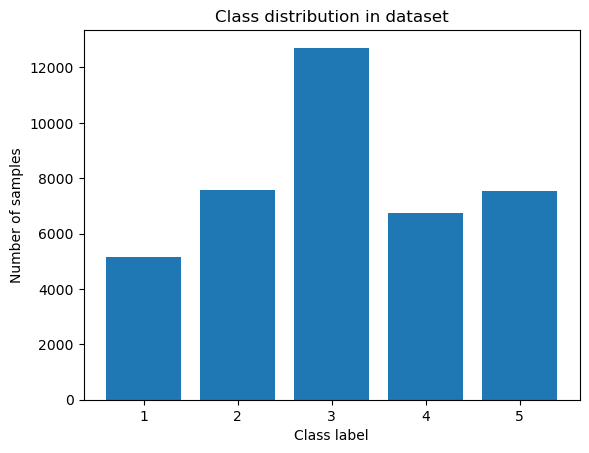

[1 2 3 4 5] [ 5144  7591 12712  6755  7536]


In [307]:
#plot a graph with the number of occurences for each malignancy score
unique_labels, counts = np.unique(df.malignancy, return_counts=True)
plt.bar(unique_labels, counts)
plt.xlabel('Class label')
plt.ylabel('Number of samples')
plt.title('Class distribution in dataset')
plt.show()

print(unique_labels, counts)

In [308]:
#filter the nodules that have a mean malignancy score lesser than 2.5 or greater than 3.5
df_filtered = df[(df['mean_malignancy'] < 2.9) | (df['mean_malignancy'] > 3.1)]


#redefine the index of the filtered dataframe, dropping the previous index column (because rows were deleted)
df_filtered.reset_index(drop=True, inplace=True)


print(df_filtered.shape)
df_filtered.tail()

(34204, 126)


,scanID,annotationID,noduleID,subtlety,internalStructure,calcification,sphericity,margin,lobulation,spiculation,...,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,mean_malignancy
34199,1018,6859,2651,5,1,6,5,5,2,1,...,0.003966,6.615987,0.372144,21.220923,0.030903,0.016933,773.073592,0.050433,18.187751,2.5
34200,1018,6859,2651,5,1,6,5,5,2,1,...,0.006790,6.411944,0.373757,22.283018,0.035191,0.022321,475.928204,0.059559,17.234483,2.5
34201,1018,6859,2651,5,1,6,5,5,2,1,...,0.007882,6.029190,0.388664,37.883572,0.028339,0.034135,369.576876,0.070248,20.433615,2.5
34202,1018,6859,2651,5,1,6,5,5,2,1,...,0.007078,5.906476,0.460417,9.210254,0.019709,0.066303,316.625583,0.091272,26.612528,2.5
34203,1018,6859,2651,5,1,6,5,5,2,1,...,0.025195,5.282221,0.451429,3.054959,0.051135,0.113456,99.343536,0.075466,14.189477,2.5


In [309]:
#change the values for the malignancy column
df_filtered.loc[df_filtered['malignancy'].isin([1, 2]), 'malignancy'] = -1
df_filtered.loc[df_filtered['malignancy'].isin([4, 5]), 'malignancy'] = 1
df_filtered.loc[df_filtered['malignancy'] == 3, 'malignancy'] = 0

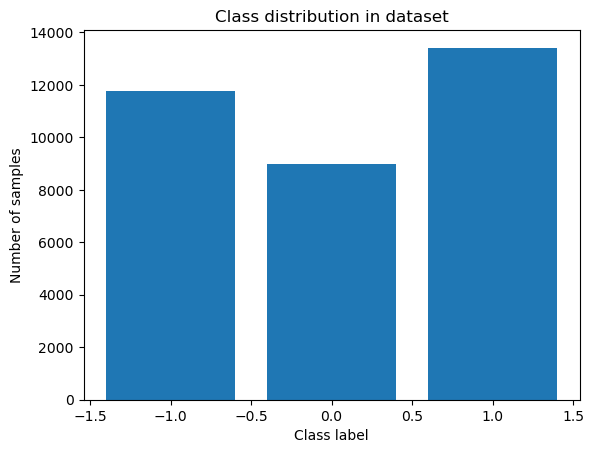

[-1  0  1] [11784  9002 13418]


In [310]:
#plot a graph with the number of occurences for each malignancy score after dealing with all malignancy scores of 3
unique_labels, counts = np.unique(df_filtered.malignancy, return_counts=True)
plt.bar(unique_labels, counts)
plt.xlabel('Class label')
plt.ylabel('Number of samples')
plt.title('Class distribution in dataset')
plt.show()

print(unique_labels, counts)

In [311]:
#deal with the last cases thave have malignancy score 3
for i in range(len(df_filtered)):
    
    #check if malignancy score is 3
    if df_filtered.at[i, 'malignancy'] == 0:
        
        #get the mean of the malignancy
        mean_value = df_filtered.at[i, 'mean_malignancy']
                                
        #if the mean of the malignancy is less than 2.5, we assume the malignancy is -1 
        if 0 <= mean_value < 2.9:
            df_filtered.at[i, 'malignancy'] = -1
                                   
        #if the mean of the malignancy is less than 2.5, we assume the malignancy is 1  
        elif 3.1 < mean_value <= 5:
            df_filtered.at[i, 'malignancy'] = 1

In [312]:
#remove the column with the mean of malignancy
df_filtered = df_filtered.drop("mean_malignancy", axis=1)
     

#view new dataframe
print(df_filtered.shape)
df_filtered.tail()

(34204, 125)


,scanID,annotationID,noduleID,subtlety,internalStructure,calcification,sphericity,margin,lobulation,spiculation,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
34199,1018,6859,2651,5,1,6,5,5,2,1,...,507.253885,0.003966,6.615987,0.372144,21.220923,0.030903,0.016933,773.073592,0.050433,18.187751
34200,1018,6859,2651,5,1,6,5,5,2,1,...,317.151921,0.006790,6.411944,0.373757,22.283018,0.035191,0.022321,475.928204,0.059559,17.234483
34201,1018,6859,2651,5,1,6,5,5,2,1,...,293.377966,0.007882,6.029190,0.388664,37.883572,0.028339,0.034135,369.576876,0.070248,20.433615
34202,1018,6859,2651,5,1,6,5,5,2,1,...,225.216583,0.007078,5.906476,0.460417,9.210254,0.019709,0.066303,316.625583,0.091272,26.612528
34203,1018,6859,2651,5,1,6,5,5,2,1,...,65.540091,0.025195,5.282221,0.451429,3.054959,0.051135,0.113456,99.343536,0.075466,14.189477


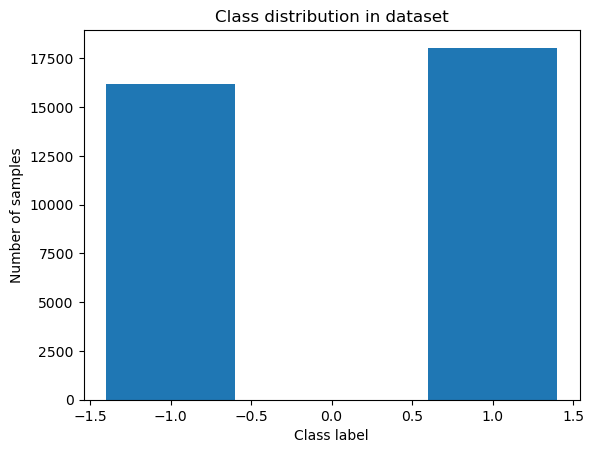

[-1  1] [16164 18040]


In [313]:
#plot a graph with the number of occurences for each malignancy score after dealing with all malignancy scores of 3
unique_labels, counts = np.unique(df_filtered.malignancy, return_counts=True)
plt.bar(unique_labels, counts)
plt.xlabel('Class label')
plt.ylabel('Number of samples')
plt.title('Class distribution in dataset')
plt.show()

print(unique_labels, counts)

# 

# 4. Balancing The Data

As seen in the graph above, the amount of negative values (10125) is a bit lesser than the amount of positive values (13003).<br>
In order to obtain a dataset with the same amount of labels, we are going to oversample the minority!

In [314]:
#separating the dataset in X and y
X = df_filtered.drop("malignancy", axis=1)
y = df_filtered["malignancy"]


#oversampling the values
oversample = RandomOverSampler(sampling_strategy={-1: 17000}, random_state=42)
X_res, y_res = oversample.fit_resample(X, y)
X_res = X_res.reset_index(drop=True)
y_res = y_res.reset_index(drop=True)


#undersampling the values
undersample = RandomUnderSampler(sampling_strategy={1: 17000}, random_state=42)
X_res2, y_res2 = undersample.fit_resample(X_res, y_res)
X_res2 = X_res2.reset_index(drop=True)
y_res2 = y_res2.reset_index(drop=True)


#check the distribution
print("Original distribution: ", Counter(y))
print("Balanced distribution: ", Counter(y_res2))

Original distribution:  Counter({1: 18040, -1: 16164})
Balanced distribution:  Counter({-1: 17000, 1: 17000})


In [315]:
#assembling the dataset back together
df_filtered = pd.DataFrame(X_res2, columns=X.columns)
df_filtered['malignancy'] = y_res2  

print(df_filtered.shape)
df_filtered.tail()

(34000, 125)


,scanID,annotationID,noduleID,subtlety,internalStructure,calcification,sphericity,margin,lobulation,spiculation,...,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,malignancy
33995,531,3825,1403,5,1,6,5,4,1,5,...,0.013046,5.680413,0.761905,0.621094,0.015609,0.087846,1093.911196,0.302266,49.118725,1
33996,459,3315,1197,5,1,6,2,4,2,5,...,0.007308,6.304305,0.643204,3.714931,0.029150,0.013363,3419.290099,0.243003,23.132870,1
33997,985,6630,2557,1,1,6,2,1,1,1,...,0.071072,3.757925,0.605263,1.183365,0.111337,0.169636,57.111017,0.131085,6.749435,1
33998,713,4885,1841,5,1,6,5,1,2,3,...,0.048681,4.356558,0.710526,0.315501,0.074468,0.142380,264.400818,0.627652,21.113669,1
33999,759,5134,1936,5,1,6,4,5,2,1,...,0.016741,5.444285,0.656805,2.087331,0.017215,0.075658,716.018390,0.250185,33.567072,1


# 

# 5. Feature Selection

The presence of unrelated features can, sometimes, degrade the quality of our model. As such, we will analyze how the different features behave in relation to our label, and will decide if it is necessary to remove any feature.

malignancy                                           1.000000
diameter                                             0.551996
original_glcm_Imc1                                   0.508161
original_shape2D_MaximumDiameter                     0.500289
original_shape2D_MajorAxisLength                     0.493547
                                                       ...   
original_glcm_MCC                                   -0.358972
original_gldm_SmallDependenceLowGrayLevelEmphasis   -0.366442
original_glszm_ZonePercentage                       -0.366573
original_gldm_DependenceNonUniformityNormalized     -0.410792
original_shape2D_PerimeterSurfaceRatio              -0.422652
Name: malignancy, Length: 122, dtype: float64


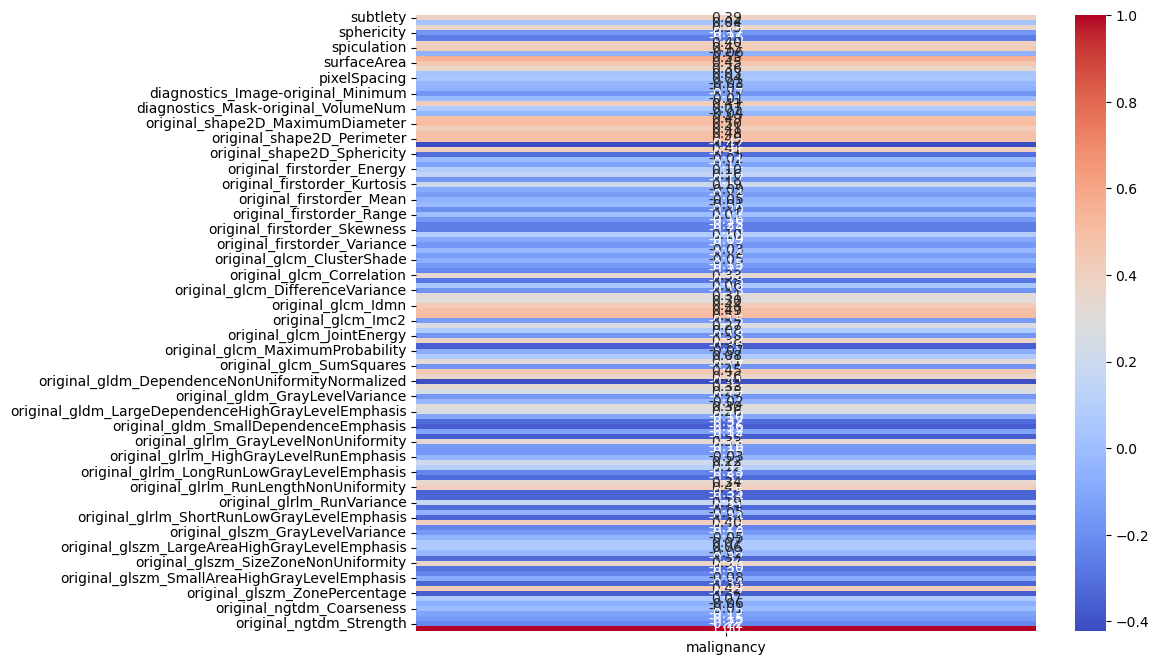

In [316]:
#correlation of each feature with the target variable
df_temp = df_filtered.copy()
df_temp.drop(columns=['scanID', 'noduleID', 'annotationID'], inplace=True)
correlations = df_temp.corr()
target_correlation = correlations['malignancy'].sort_values(ascending=False)
print(target_correlation)

#plot the correlation of each feature
plt.figure(figsize=(10, 8))
sns.heatmap(correlations[["malignancy"]], annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [317]:
#see the "useless" features (correlation less than 0.05)
useless_features = target_correlation[(target_correlation > -0.05) & (target_correlation < 0.05)]
useless_features

pixelSpacing                                    0.044285
internalStructure                               0.036858
sliceThickness                                  0.033364
original_firstorder_Range                       0.005834
original_ngtdm_Coarseness                      -0.007279
diagnostics_Image-original_Maximum             -0.012979
original_firstorder_Median                     -0.014212
original_firstorder_10Percentile               -0.016130
original_glszm_LargeAreaLowGrayLevelEmphasis   -0.023082
original_gldm_HighGrayLevelEmphasis            -0.024377
original_glrlm_HighGrayLevelRunEmphasis        -0.031337
sliceID                                        -0.031755
original_glcm_Autocorrelation                  -0.033592
original_shape2D_Elongation                    -0.038208
original_glszm_HighGrayLevelZoneEmphasis       -0.047933
Name: malignancy, dtype: float64

In [318]:
#drop the "useless" features
useless_features_drop = useless_features.index
df_filtered = df_filtered.drop(columns=useless_features_drop)


print(df_filtered.shape)
df_filtered.tail()

(34000, 110)


,scanID,annotationID,noduleID,subtlety,calcification,sphericity,margin,lobulation,spiculation,texture,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,malignancy
33995,531,3825,1403,5,6,5,4,1,5,4,...,504.921431,0.013046,5.680413,0.761905,0.621094,0.015609,1093.911196,0.302266,49.118725,1
33996,459,3315,1197,5,6,2,4,2,5,4,...,860.261609,0.007308,6.304305,0.643204,3.714931,0.029150,3419.290099,0.243003,23.132870,1
33997,985,6630,2557,1,6,2,1,1,1,1,...,27.223539,0.071072,3.757925,0.605263,1.183365,0.111337,57.111017,0.131085,6.749435,1
33998,713,4885,1841,5,6,5,1,2,3,3,...,86.083333,0.048681,4.356558,0.710526,0.315501,0.074468,264.400818,0.627652,21.113669,1
33999,759,5134,1936,5,6,4,5,2,1,5,...,341.360555,0.016741,5.444285,0.656805,2.087331,0.017215,716.018390,0.250185,33.567072,1


# 

# 6. Normalizing The Data

Models sensitive to the scale of the input benefit a lot from nornalization; but not all features can be normalized. Categorical features (such as subtlety, calcification, ...) must not be normalized, while continuous features (such as diameter, volume, ...) should be normalized in order to best fit our model.

In [319]:
#see the data types present, and their amount
df_filtered_normalized = df_filtered.copy()
df_filtered_normalized.dtypes.value_counts()

float64    99
int64      11
dtype: int64

In [320]:
#get the categorical features
categorical_features = df_filtered_normalized.select_dtypes(include=['int']).columns
categorical_features

Index(['scanID', 'annotationID', 'noduleID', 'subtlety', 'calcification',
       'sphericity', 'margin', 'lobulation', 'spiculation', 'texture',
       'malignancy'],
      dtype='object')

In [321]:
#get the continuous features (that we will normalize)
features_to_normalize = df_filtered_normalized.drop(categorical_features, axis=1)
features_to_normalize_cols = features_to_normalize.columns
features_to_normalize_cols

Index(['diameter', 'surfaceArea', 'volume', 'diagnostics_Image-original_Mean',
       'diagnostics_Image-original_Minimum',
       'diagnostics_Mask-original_VoxelNum',
       'diagnostics_Mask-original_VolumeNum',
       'original_shape2D_MajorAxisLength', 'original_shape2D_MaximumDiameter',
       'original_shape2D_MeshSurface', 'original_shape2D_MinorAxisLength',
       'original_shape2D_Perimeter', 'original_shape2D_PerimeterSurfaceRatio',
       'original_shape2D_PixelSurface', 'original_shape2D_Sphericity',
       'original_firstorder_90Percentile', 'original_firstorder_Energy',
       'original_firstorder_Entropy', 'original_firstorder_InterquartileRange',
       'original_firstorder_Kurtosis', 'original_firstorder_Maximum',
       'original_firstorder_MeanAbsoluteDeviation', 'original_firstorder_Mean',
       'original_firstorder_Minimum',
       'original_firstorder_RobustMeanAbsoluteDeviation',
       'original_firstorder_RootMeanSquared', 'original_firstorder_Skewness',
    

In [322]:
scaler = MinMaxScaler()
df_filtered_normalized[features_to_normalize_cols] = scaler.fit_transform(df_filtered_normalized[features_to_normalize_cols])

print(df_filtered_normalized.shape)
df_filtered_normalized.tail()

(34000, 110)


,scanID,annotationID,noduleID,subtlety,calcification,sphericity,margin,lobulation,spiculation,texture,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,malignancy
33995,531,3825,1403,5,6,5,4,1,5,4,...,0.058795,0.016584,0.789724,0.748032,0.000106,0.001076,0.015384,0.000452,0.075434,1
33996,459,3315,1197,5,6,2,4,2,5,4,...,0.100176,0.008414,0.876461,0.622415,0.000636,0.002010,0.048088,0.000363,0.035526,1
33997,985,6630,2557,1,6,2,1,1,1,1,...,0.003166,0.099207,0.522448,0.582264,0.000203,0.007678,0.000803,0.000196,0.010365,1
33998,713,4885,1841,5,6,5,1,2,3,3,...,0.010020,0.067324,0.605674,0.693660,0.000054,0.005136,0.003718,0.000938,0.032425,1
33999,759,5134,1936,5,6,4,5,2,1,5,...,0.039748,0.021845,0.756896,0.636808,0.000358,0.001187,0.010070,0.000374,0.051551,1


# 

# 7. Saving The Datasets

We now have 2 diferent datasets:<br>
df_filtered contains the final dataset, not normalized!<br>
df_filtered_normalized contains the final dataset, normalized!<br>

In this final step, we will simply create variations for both these datasets, grouping them by slice, annotation and nodule.

In [323]:
#view the not normalized dataframe
print(df_filtered.shape)
df_filtered.tail()

(34000, 110)


,scanID,annotationID,noduleID,subtlety,calcification,sphericity,margin,lobulation,spiculation,texture,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,malignancy
33995,531,3825,1403,5,6,5,4,1,5,4,...,504.921431,0.013046,5.680413,0.761905,0.621094,0.015609,1093.911196,0.302266,49.118725,1
33996,459,3315,1197,5,6,2,4,2,5,4,...,860.261609,0.007308,6.304305,0.643204,3.714931,0.029150,3419.290099,0.243003,23.132870,1
33997,985,6630,2557,1,6,2,1,1,1,1,...,27.223539,0.071072,3.757925,0.605263,1.183365,0.111337,57.111017,0.131085,6.749435,1
33998,713,4885,1841,5,6,5,1,2,3,3,...,86.083333,0.048681,4.356558,0.710526,0.315501,0.074468,264.400818,0.627652,21.113669,1
33999,759,5134,1936,5,6,4,5,2,1,5,...,341.360555,0.016741,5.444285,0.656805,2.087331,0.017215,716.018390,0.250185,33.567072,1


In [324]:
#view the normalized dataframe
print(df_filtered_normalized.shape)
df_filtered_normalized.tail()

(34000, 110)


,scanID,annotationID,noduleID,subtlety,calcification,sphericity,margin,lobulation,spiculation,texture,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,malignancy
33995,531,3825,1403,5,6,5,4,1,5,4,...,0.058795,0.016584,0.789724,0.748032,0.000106,0.001076,0.015384,0.000452,0.075434,1
33996,459,3315,1197,5,6,2,4,2,5,4,...,0.100176,0.008414,0.876461,0.622415,0.000636,0.002010,0.048088,0.000363,0.035526,1
33997,985,6630,2557,1,6,2,1,1,1,1,...,0.003166,0.099207,0.522448,0.582264,0.000203,0.007678,0.000803,0.000196,0.010365,1
33998,713,4885,1841,5,6,5,1,2,3,3,...,0.010020,0.067324,0.605674,0.693660,0.000054,0.005136,0.003718,0.000938,0.032425,1
33999,759,5134,1936,5,6,4,5,2,1,5,...,0.039748,0.021845,0.756896,0.636808,0.000358,0.001187,0.010070,0.000374,0.051551,1


## 

## &emsp;&emsp;&emsp;7.1 Grouped By Slice

In [325]:
#for the not normalized one
final_by_slices = df_filtered.copy()
final_by_slices = final_by_slices.drop(["scanID", "annotationID", "noduleID"], axis=1)

final_by_slices.to_csv("final_by_slices.csv", index=False)
final_by_slices = pd.read_csv("final_by_slices.csv")
        
                     
print(final_by_slices.shape)
final_by_slices.tail()

(34000, 107)


,subtlety,calcification,sphericity,margin,lobulation,spiculation,texture,diameter,surfaceArea,volume,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,malignancy
33995,5,6,5,4,1,5,4,13.427734,393.825061,365.007527,...,504.921431,0.013046,5.680413,0.761905,0.621094,0.015609,1093.911196,0.302266,49.118725,1
33996,5,6,2,4,2,5,4,40.017861,2806.747528,5309.919102,...,860.261609,0.007308,6.304305,0.643204,3.714931,0.029150,3419.290099,0.243003,23.132870,1
33997,1,6,2,1,1,1,1,11.423962,300.887571,291.660919,...,27.223539,0.071072,3.757925,0.605263,1.183365,0.111337,57.111017,0.131085,6.749435,1
33998,5,6,5,1,2,3,3,34.764177,2098.253567,3621.512604,...,86.083333,0.048681,4.356558,0.710526,0.315501,0.074468,264.400818,0.627652,21.113669,1
33999,5,6,4,5,2,1,5,13.792894,497.419743,679.103394,...,341.360555,0.016741,5.444285,0.656805,2.087331,0.017215,716.018390,0.250185,33.567072,1


In [326]:
#for the normalized one
final_by_slices_normalized = df_filtered_normalized.copy()
final_by_slices_normalized = final_by_slices_normalized.drop(["scanID", "annotationID", "noduleID"], axis=1)

final_by_slices_normalized.to_csv("final_by_slices_normalized.csv", index=False)
final_by_slices_normalized = pd.read_csv("final_by_slices_normalized.csv")
        
                     
print(final_by_slices_normalized.shape)
final_by_slices_normalized.tail()

(34000, 107)


,subtlety,calcification,sphericity,margin,lobulation,spiculation,texture,diameter,surfaceArea,volume,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,malignancy
33995,5,6,5,4,1,5,4,0.180872,0.042266,0.011516,...,0.058795,0.016584,0.789724,0.748032,0.000106,0.001076,0.015384,0.000452,0.075434,1
33996,5,6,2,4,2,5,4,0.633195,0.309961,0.170489,...,0.100176,0.008414,0.876461,0.622415,0.000636,0.002010,0.048088,0.000363,0.035526,1
33997,1,6,2,1,1,1,1,0.146786,0.031956,0.009158,...,0.003166,0.099207,0.522448,0.582264,0.000203,0.007678,0.000803,0.000196,0.010365,1
33998,5,6,5,1,2,3,3,0.543825,0.231359,0.116208,...,0.010020,0.067324,0.605674,0.693660,0.000054,0.005136,0.003718,0.000938,0.032425,1
33999,5,6,4,5,2,1,5,0.187083,0.053759,0.021614,...,0.039748,0.021845,0.756896,0.636808,0.000358,0.001187,0.010070,0.000374,0.051551,1


 ## 

## &emsp;&emsp;&emsp;7.2 Grouped By Annotation

In [327]:
#for the not normalized one
final_by_annotations = df_filtered.copy()

final_by_annotations = final_by_annotations.groupby("annotationID").mean().reset_index()
final_by_annotations = final_by_annotations.drop(["scanID", "annotationID", "noduleID"], axis=1)

final_by_annotations.to_csv("final_by_annotations.csv", index=False)
final_by_annotations = pd.read_csv("final_by_annotations.csv")


print(final_by_annotations.shape)
final_by_annotations.tail()

(5693, 107)


,subtlety,calcification,sphericity,margin,lobulation,spiculation,texture,diameter,surfaceArea,volume,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,malignancy
5688,5.0,6.0,4.0,5.0,1.0,1.0,5.0,5.208441,112.331939,81.383582,...,60.749475,0.117220,3.460647,0.710714,0.367762,0.074613,153.753781,0.771250,22.159005,-1.0
5689,2.0,6.0,4.0,3.0,1.0,1.0,5.0,6.903409,113.559516,87.615658,...,74.481656,0.097900,4.239957,0.793617,0.344389,0.090430,299.379518,0.446675,16.081552,1.0
5690,4.0,6.0,3.0,4.0,2.0,1.0,5.0,9.477089,200.490851,166.799683,...,166.990090,0.039447,4.574864,0.786275,0.381078,0.033905,422.548904,0.318031,37.454444,1.0
5691,5.0,2.0,5.0,5.0,4.0,5.0,5.0,39.591042,5193.191357,24959.267801,...,232.015827,0.008893,6.179713,0.391361,21.323181,0.061078,421.117993,0.060911,15.877627,-1.0
5692,5.0,6.0,5.0,5.0,2.0,1.0,5.0,39.221169,5114.451940,25451.183733,...,314.507678,0.008781,6.239626,0.386026,21.353099,0.045313,599.510278,0.058292,16.606195,-1.0


In [328]:
#for the normalized one
final_by_annotations_normalized = df_filtered_normalized.copy()

final_by_annotations_normalized = final_by_annotations_normalized.groupby("annotationID").mean().reset_index()
final_by_annotations_normalized = final_by_annotations_normalized.drop(["scanID", "annotationID", "noduleID"], axis=1)

final_by_annotations_normalized.to_csv("final_by_annotations_normalized.csv", index=False)
final_by_annotations_normalized = pd.read_csv("final_by_annotations_normalized.csv")


print(final_by_annotations_normalized.shape)
final_by_annotations_normalized.tail()

(5693, 107)


,subtlety,calcification,sphericity,margin,lobulation,spiculation,texture,diameter,surfaceArea,volume,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,malignancy
5688,5.0,6.0,4.0,5.0,1.0,1.0,5.0,0.041054,0.011037,0.002398,...,0.007070,0.164916,0.481119,0.693859,0.000063,0.005146,0.002162,0.001153,0.034031,-1.0
5689,2.0,6.0,4.0,3.0,1.0,1.0,5.0,0.069887,0.011173,0.002598,...,0.008669,0.137407,0.589463,0.781592,0.000059,0.006237,0.004210,0.000668,0.024697,1.0
5690,4.0,6.0,3.0,4.0,2.0,1.0,5.0,0.113667,0.020818,0.005144,...,0.019442,0.054176,0.636024,0.773822,0.000065,0.002338,0.005943,0.000476,0.057521,1.0
5691,5.0,2.0,5.0,5.0,4.0,5.0,5.0,0.625935,0.574718,0.802191,...,0.027014,0.010671,0.859139,0.355899,0.003652,0.004212,0.005922,0.000091,0.024384,-1.0
5692,5.0,6.0,5.0,5.0,2.0,1.0,5.0,0.619643,0.565982,0.818005,...,0.036621,0.010511,0.867469,0.350252,0.003657,0.003125,0.008431,0.000087,0.025503,-1.0


## 

## &emsp;&emsp;&emsp;7.3 Grouped By Nodule

In [329]:
#for the not normalized one
final_by_nodules = df_filtered.copy()

separadoX = final_by_nodules.drop("malignancy", axis=1)
separadoY = final_by_nodules[["noduleID", "malignancy"]]
separadoX = separadoX.groupby("noduleID").mean().reset_index()
separadoY = separadoY.groupby("noduleID").agg({'malignancy': lambda x: x.mode()[0]}).reset_index()
final_by_nodules = pd.merge(separadoX, separadoY, on='noduleID').reset_index(drop=True)

final_by_nodules = final_by_nodules.drop(["scanID", "annotationID", "noduleID"], axis=1)
final_by_nodules.to_csv("final_by_nodules.csv", index=False)
final_by_nodules = pd.read_csv("final_by_nodules.csv")


print(final_by_nodules.shape)
final_by_nodules.tail()

(2037, 107)


,subtlety,calcification,sphericity,margin,lobulation,spiculation,texture,diameter,surfaceArea,volume,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,malignancy
2032,4.333333,6.000000,3.625000,2.375000,2.458333,2.958333,3.291667,9.891422,258.191190,142.785788,...,71.712919,0.091000,3.797388,0.715491,0.691266,0.114403,198.271320,0.366824,13.645714,1
2033,3.200000,6.000000,4.733333,2.466667,1.000000,1.733333,1.000000,10.086790,319.618468,206.282043,...,19.503303,0.095368,3.789711,0.546687,1.656464,0.574304,46.946945,0.126593,3.365927,1
2034,3.200000,6.000000,3.400000,3.600000,1.600000,1.000000,5.000000,8.447617,165.718317,135.126073,...,129.986716,0.062828,4.440901,0.789212,0.366402,0.056515,373.281150,0.369489,28.905287,1
2035,5.000000,6.000000,4.000000,5.000000,1.000000,1.000000,5.000000,5.208441,112.331939,81.383582,...,60.749475,0.117220,3.460647,0.710714,0.367762,0.074613,153.753781,0.771250,22.159005,-1
2036,5.000000,4.074074,5.000000,5.000000,2.962963,2.925926,5.000000,39.399256,5152.363511,25214.335321,...,274.789380,0.008835,6.210779,0.388595,21.338694,0.052903,513.617696,0.059553,16.255403,-1


In [330]:
#for the normalized one
final_by_nodules_normalized = df_filtered_normalized.copy()

separadoX_normalized = final_by_nodules_normalized.drop("malignancy", axis=1)
separadoY_normalized = final_by_nodules_normalized[["noduleID", "malignancy"]]
separadoX_normalized = separadoX_normalized.groupby("noduleID").mean().reset_index()
separadoY_normalized = separadoY_normalized.groupby("noduleID").agg({'malignancy': lambda x: x.mode()[0]}).reset_index()
final_by_nodules_normalized = pd.merge(separadoX_normalized, separadoY_normalized, on='noduleID').reset_index(drop=True)

final_by_nodules_normalized = final_by_nodules_normalized.drop(["scanID", "annotationID", "noduleID"], axis=1)
final_by_nodules_normalized.to_csv("final_by_nodules_normalized.csv", index=False)
final_by_nodules_normalized = pd.read_csv("final_by_nodules_normalized.csv")


print(final_by_nodules_normalized.shape)
final_by_nodules_normalized.tail()

(2037, 107)


,subtlety,calcification,sphericity,margin,lobulation,spiculation,texture,diameter,surfaceArea,volume,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,malignancy
2032,4.333333,6.000000,3.625000,2.375000,2.458333,2.958333,3.291667,0.120716,0.027219,0.004372,...,0.008347,0.127581,0.527935,0.698914,0.000118,0.007890,0.002788,0.000548,0.020956,1
2033,3.200000,6.000000,4.733333,2.466667,1.000000,1.733333,1.000000,0.124039,0.034034,0.006413,...,0.002267,0.133801,0.526867,0.520275,0.000284,0.039607,0.000660,0.000189,0.005169,1
2034,3.200000,6.000000,3.400000,3.600000,1.600000,1.000000,5.000000,0.096155,0.016960,0.004125,...,0.015133,0.087468,0.617400,0.776930,0.000063,0.003898,0.005250,0.000552,0.044391,1
2035,5.000000,6.000000,4.000000,5.000000,1.000000,1.000000,5.000000,0.041054,0.011037,0.002398,...,0.007070,0.164916,0.481119,0.693859,0.000063,0.005146,0.002162,0.001153,0.034031,-1
2036,5.000000,4.074074,5.000000,5.000000,2.962963,2.925926,5.000000,0.622672,0.570188,0.810391,...,0.031996,0.010588,0.863458,0.352971,0.003655,0.003649,0.007223,0.000089,0.024964,-1
